## 12-Nov-2023, [Chelsea vs MC](https://www.fotmob.com/matches/chelsea-vs-manchester-city/2d55kw#4193574)

In [2]:
from mplsoccer.pitch import Pitch
import pandas as pd

# spadl format assumes pitch size 68 x 105,
# so we use pitch_type=`uefa` for mplsoccer
# https://socceraction.readthedocs.io/en/latest/documentation/spadl/spadl.html

def get_pitch():
  return Pitch(pitch_type='uefa',
              pitch_color='white',
              line_color='#c7d5cc')

In [3]:
# Temp change for simpler debugging
pd.options.display.max_rows = 120 # was 60

# Loading data from WhoScored (via soccerdata cache)

In [4]:
import soccerdata as sd
import os
from pathlib import Path

# https://www.whoscored.com/Matches/1729243/Live/England-Premier-League-2023-2024-Chelsea-Manchester-City

data_dir=Path(f"{os.getcwd()}/../data/soccerdata_cache")
ws = sd.WhoScored(leagues="ENG-Premier League", seasons="23-24", data_dir=data_dir)

[01/27/24 14:06:41] INFO     No custom team name replacements found. You can configure these in       ]8;id=912011;file:///usr/local/lib/python3.11/site-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=124621;file:///usr/local/lib/python3.11/site-packages/soccerdata/_config.py#84\84]8;;\
                             /Users/ivn/soccerdata/config/teamname_replacements.json.                              

                    INFO     No custom league dict found. You can configure additional leagues in    ]8;id=580780;file:///usr/local/lib/python3.11/site-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=339499;file:///usr/local/lib/python3.11/site-packages/soccerdata/_config.py#162\162]8;;\
                             /Users/ivn/soccerdata/config/league_dict.json.                                        

                    INFO     Saving cached data to                                                    ]8;id=951949;file:///usr/local/lib/python3.11/site-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=368808;file:///usr/local/lib/python3.11/site-packages/soccerdata/_common.py#91\91]8;;\
                             /Users/ivn/Documents/projects/fa_ucu/Manchester-City/src/../data/soccerd              
                             ata_cache                                                                             

[01/27/24 14:06:43] INFO     patching driver executable /Users/ivn/Library/Application               ]8;id=276086;file:///usr/local/lib/python3.11/site-packages/undetected_chromedriver/patcher.py\patcher.py]8;;\:]8;id=29816;file:///usr/local/lib/python3.11/site-packages/undetected_chromedriver/patcher.py#346\346]8;;\
                             Support/undetected_chromedriver/undetected_chromedriver                               

In [5]:
# read it here once so we can force cache later
epl_schedule = ws.read_schedule(force_cache=True)

[01/27/24 14:06:44] INFO     Retrieving game schedule of ENG-Premier League - 2324 from the cache  ]8;id=315934;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py\whoscored.py]8;;\:]8;id=40886;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py#437\437]8;;\

In [6]:
GAME_ID=1729243
events_raw = ws.read_events(match_id=GAME_ID, force_cache=True, output_fmt="raw")
events_spadl = ws.read_events(match_id=GAME_ID, force_cache=True, output_fmt="spadl")
events_atomic_spadl = ws.read_events(match_id=GAME_ID, force_cache=True, output_fmt="atomic-spadl")
events = ws.read_events(match_id=GAME_ID, force_cache=True, output_fmt="events")

[01/27/24 14:06:45] INFO     Retrieving game schedule of ENG-Premier League - 2324 from the cache  ]8;id=972936;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py\whoscored.py]8;;\:]8;id=176201;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1729243                                 ]8;id=604361;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py\whoscored.py]8;;\:]8;id=615696;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py#693\693]8;;\

                    INFO     Retrieving game schedule of ENG-Premier League - 2324 from the cache  ]8;id=19600;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py\whoscored.py]8;;\:]8;id=376610;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py#437\437]8;;\

[01/27/24 14:06:46] INFO     [1/1] Retrieving game with id=1729243                                 ]8;id=753407;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py\whoscored.py]8;;\:]8;id=229172;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py#693\693]8;;\

                    INFO     Retrieving game schedule of ENG-Premier League - 2324 from the cache  ]8;id=954954;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py\whoscored.py]8;;\:]8;id=723751;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1729243                                 ]8;id=372522;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py\whoscored.py]8;;\:]8;id=564934;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py#693\693]8;;\

                    INFO     Retrieving game schedule of ENG-Premier League - 2324 from the cache  ]8;id=465341;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py\whoscored.py]8;;\:]8;id=8424;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1729243                                 ]8;id=836734;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py\whoscored.py]8;;\:]8;id=583482;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py#693\693]8;;\

In [7]:
missing_players = ws.read_missing_players(match_id=1729243, force_cache=True)

                    INFO     Retrieving game schedule of ENG-Premier League - 2324 from the cache  ]8;id=991637;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py\whoscored.py]8;;\:]8;id=821286;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1729243                                 ]8;id=877964;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py\whoscored.py]8;;\:]8;id=56005;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py#538\538]8;;\

In [8]:
import socceraction

# use
# socceraction.spadl.config.actiontypes
# socceraction.spadl.config.results
# socceraction.spadl.config.bodyparts
# to interpret values
# e.g.
print(socceraction.spadl.config.actiontypes[0])
events_spadl[:3]

pass


,game_id,original_event_id,period_id,time_seconds,team_id,player_id,start_x,end_x,start_y,end_y,type_id,result_id,bodypart_id,action_id,player,team
0,1729243,2617287487,1,0.0,15,426050.0,52.920,47.145,33.524,30.260,0,1,0,0,Nicolas Jackson,Chelsea
1,1729243,2617287575,1,1.0,15,369430.0,49.875,63.840,29.920,2.176,0,1,0,1,Enzo Fernández,Chelsea
2,1729243,NaN,1,3.0,15,361330.0,63.840,45.780,2.176,7.276,21,1,0,2,Reece James,Chelsea


In [9]:
missing_players

game_id  \
league             season game                               team            player                        
ENG-Premier League 2324   2023-11-12 Chelsea-Manchester City Chelsea         Armando Broja       1729243   
                                                                             Ben Chilwell        1729243   
                                                                             Carney Chukwuemeka  1729243   
                                                                             Christopher Nkunku  1729243   
                                                                             RomÃ©o Lavia        1729243   
                                                                             Trevoh Chalobah     1729243   
                                                                             Wesley Fofana       1729243   
                                                             Manchester City John Stones         1729243   
                                                                             Kevin De Bruyne     1729243   
                                                                             Manuel Akanji       1729243   
                                                                             Sergio GÃ³mez       1729243   

                                                                                                 player_id  \
league             season game                               team            player                          
ENG-Premier League 2324   2023-11-12 Chelsea-Manchester City Chelsea         Armando Broja          393407   
                                                                             Ben Chilwell           299272   
                                                                             Carney Chukwuemeka     410639   
                                                                             Christopher Nkunku     300945   
                                                                             RomÃ©o Lavia           425319   
                                                                             Trevoh Chalobah        353292   
                                                                             Wesley Fofana          373946   
                                                             Manchester City John Stones            101374   
                                                                             Kevin De Bruyne         73084   
                                                                             Manuel Akanji          297390   
                                                                             Sergio GÃ³mez          355110   

                                                                                                           reason  \
league             season game                               team            player                                 
ENG-Premier League 2324   2023-11-12 Chelsea-Manchester City Chelsea         Armando Broja       injured doubtful   
                                                                             Ben Chilwell                 injured   
                                                                             Carney Chukwuemeka           injured   
                                                                             Christopher Nkunku           injured   
                                                                             RomÃ©o Lavia                 injured   
                                                                             Trevoh Chalobah              injured   
                                                                             Wesley Fofana                injured   
                                                             Manchester City John Stones                  injured   
                                                                             Kevin De Bruyn

In [10]:
events_atomic_spadl[-5:]

,game_id,original_event_id,action_id,period_id,time_seconds,team_id,player_id,x,y,dx,dy,type_id,bodypart_id,player,team
2881,1729243,2617414441,2881,2,3717.5,167,331254.0,40.215,64.804,0.000,0.000,23,0,Phil Foden,Man City
2882,1729243,NaN,2882,2,3719.0,167,331254.0,40.215,64.804,-5.355,-6.392,21,0,Phil Foden,Man City
2883,1729243,2617414479,2883,2,3722.0,167,331254.0,34.860,58.412,0.000,0.000,7,0,Phil Foden,Man City
2884,1729243,2617414477,2884,2,3722.0,15,363496.0,34.860,58.412,0.000,0.000,9,0,Marc Cucurella,Chelsea
2885,1729243,2617414483,2885,2,3723.0,15,363496.0,35.805,55.760,NaN,NaN,21,0,Marc Cucurella,Chelsea


In [11]:
print(socceraction.atomic.spadl.config.actiontypes[23])

receival


In [12]:
city_players = list(events_atomic_spadl[events_atomic_spadl['team_id'] == 167]['player'].unique())
city_players

['Josko Gvardiol',
 'Kyle Walker',
 'Ederson',
 'Rúben Dias',
 'Bernardo Silva',
 'Erling Haaland',
 'Manuel Akanji',
 'Jérémy Doku',
 'Julián Álvarez',
 'Rodri',
 'Phil Foden',
 'Jack Grealish',
 'Mateo Kovacic']

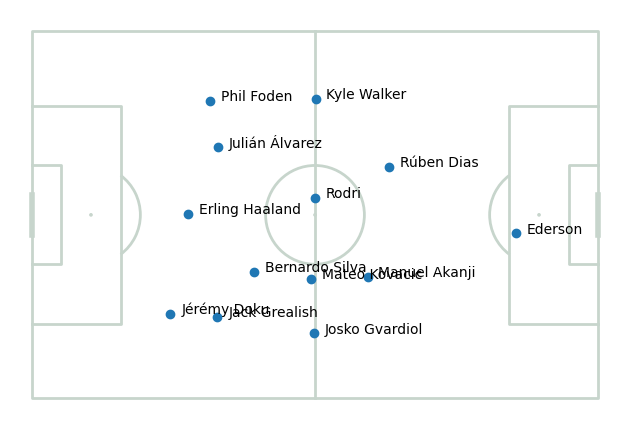

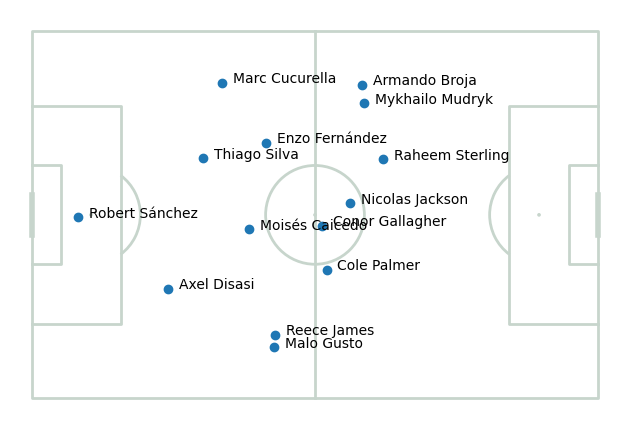

In [16]:
# Average positions for all players (including subs!)
# TODO: remove subs, compute for opposition as well, compute per 10 mins

def avg_loc_by_team(team_id: int):
    avg_loc = events_atomic_spadl[events_atomic_spadl['team_id'] == team_id].groupby('player').agg({'x': 'mean', 'y': 'mean'})
    avg_loc

    pitch = get_pitch()

    fig, ax = pitch.draw()

    sc = pitch.scatter(x=avg_loc['x'].to_list(), 
                    y=avg_loc['y'].to_list(),
                    # color=df_shot['color'].to_list(),
                    # marker='football',
                    ax=ax)

    n = avg_loc.index.to_list()
    data = sc.get_offsets()

    # leg = ax.legend(borderpad=1, markerscale=0.5, labelspacing=1.5, loc='upper center', fontsize=15)

    for idx,label in enumerate(n):
        ax.annotate(label, (data[idx][0]+2, data[idx][1]))
MC_team_id = 167
chelsea_team_id = 15
avg_loc_by_team(MC_team_id)
avg_loc_by_team(chelsea_team_id)

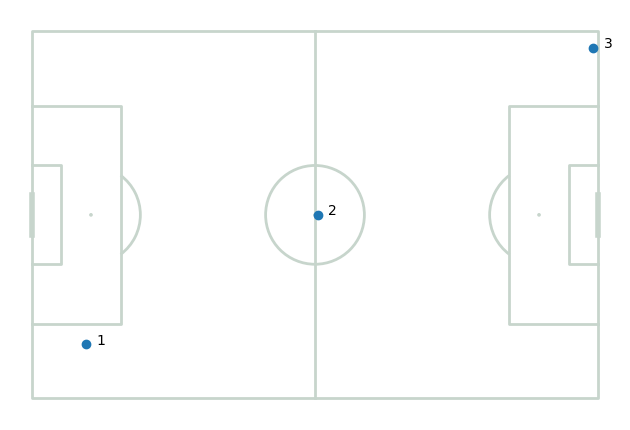

In [18]:
# Demo that `get_pitch` produces correct results
pitch = get_pitch()

fig, ax = pitch.draw()

sc = pitch.scatter(y=[10,34,65], 
                  x=[10,53,104],
                  ax=ax)

n = ['1', '2', '3']
data = sc.get_offsets()

# leg = ax.legend(borderpad=1, markerscale=0.5, labelspacing=1.5, loc='upper center', fontsize=15)

for idx,label in enumerate(n):
    ax.annotate(label, (data[idx][0]+2, data[idx][1]))

In [100]:
events_atomic_spadl[events_atomic_spadl['type_id'] == 27] 

,game_id,original_event_id,action_id,period_id,time_seconds,team_id,player_id,x,y,dx,dy,type_id,bodypart_id,player,team
731,1729243,2617318445,731,1,1443.0,167,315227.0,0.0,31.552,0.0,0.0,27,4,Erling Haaland,Man City
809,1729243,2617322463,809,1,1704.0,15,28550.0,105.0,35.632,0.0,0.0,27,1,Thiago Silva,Chelsea
1015,1729243,2617331399,1015,1,2183.0,15,97692.0,105.0,35.088,0.0,0.0,27,5,Raheem Sterling,Chelsea
1279,1729243,2617342415,1279,1,2727.0,167,297390.0,0.0,31.960,0.0,0.0,27,1,Manuel Akanji,Man City
1480,1729243,2617365595,1480,2,511.0,167,315227.0,0.0,32.232,0.0,0.0,27,2,Erling Haaland,Man City
2003,1729243,2617386415,2003,2,1705.0,15,426050.0,105.0,35.088,0.0,0.0,27,5,Nicolas Jackson,Chelsea
2623,1729243,2617404379,2623,2,2853.0,167,303139.0,0.0,31.824,0.0,0.0,27,4,Rodri,Man City
2811,1729243,2617410983,2811,2,3384.0,15,395692.0,105.0,36.788,0.0,0.0,27,4,Cole Palmer,Chelsea


In [98]:
socceraction.atomic.spadl.config.actiontypes.index('goal')

27

game_id                      1729243
original_event_id         2617331399
action_id                       1015
period_id                          1
time_seconds                  2183.0
team_id                           15
player_id                    97692.0
x                              105.0
y                             35.088
dx                               0.0
dy                               0.0
type_id                           27
bodypart_id                        5
player               Raheem Sterling
team                         Chelsea
color                          green
Name: 1015, dtype: object


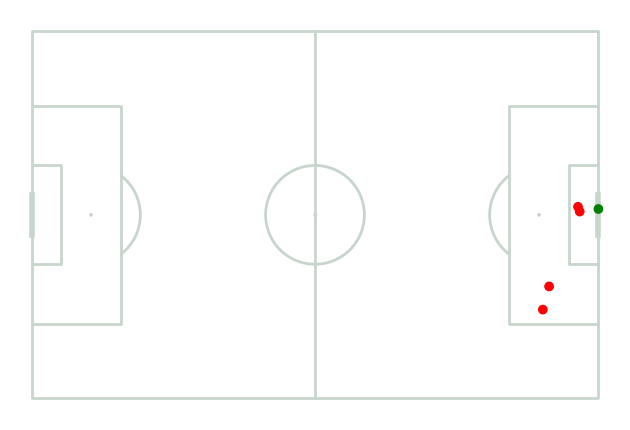

In [101]:
from mplsoccer.pitch import Pitch

# points that led to a goal at event #1015 (Sterling, goal #3)
shot = 1015
df_shot = events_atomic_spadl[shot-4:shot+1].copy()
df_shot['color'] = 'red'
df_shot.loc[shot, 'color'] = 'green'

pitch = get_pitch()
fig, ax = pitch.draw()

print(df_shot.loc[shot])
_ = pitch.scatter(x=df_shot['x'].to_list(), 
                  y=df_shot['y'].to_list(),
                  color=df_shot['color'].to_list(),
                  ax=ax)

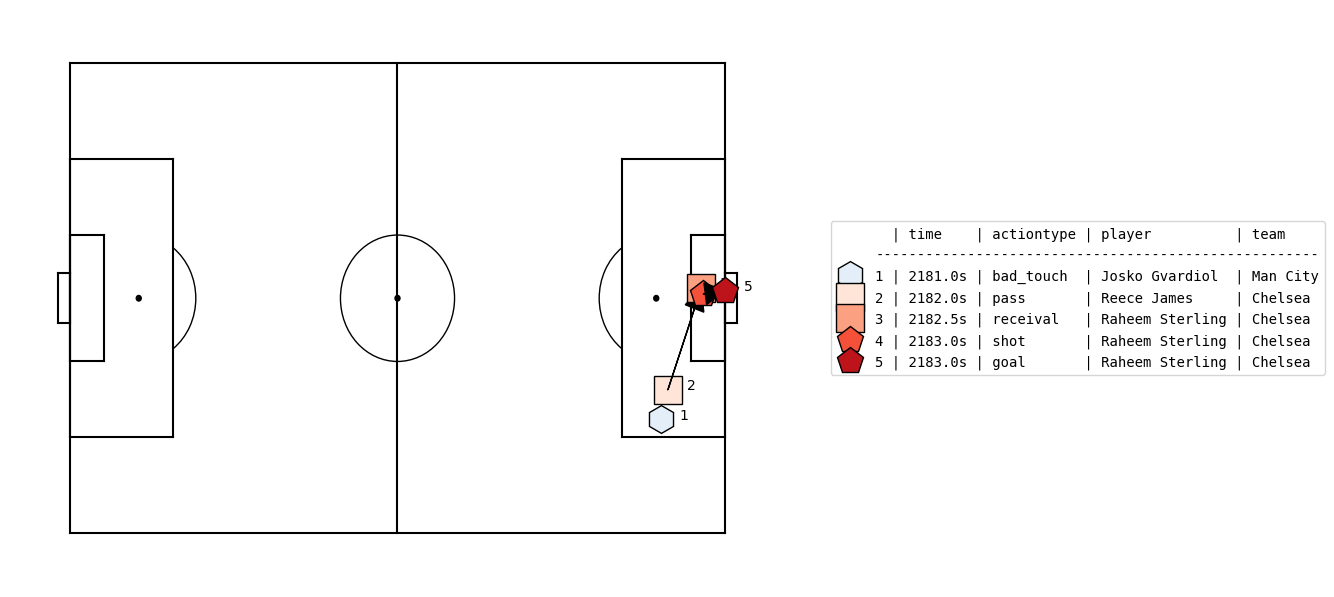

In [112]:
# Goal by Sterling
import matplotsoccer

a = df_shot

# Plot the actions
def nice_time(row):
    return f"{row.time_seconds}s"

a["nice_time"] = a.apply(nice_time, axis=1)
a["end_x"] = a["x"] + a["dx"]
a["end_y"] = a["y"] + a["dy"]
a["type"] = a.type_id.apply(lambda x: socceraction.atomic.spadl.config.actiontypes[x])
labels = a[["nice_time", "type", "player", "team"]]

ax = matplotsoccer.actions(
    location=a[["x", "y", "end_x", "end_y"]],
    action_type=a.type_id,
    team= a.team,
    # result= True,
    label=labels,
    labeltitle=["time", "actiontype", "player", "team"],
    zoom=False,
    figsize=10
)